In [1]:
import pickle
import matplotlib.pyplot as plt
from torch import optim, nn, utils, Tensor
from torchvision.transforms import ToTensor
import pytorch_lightning as L
from pytorch_lightning import loggers as pl_loggers
import torch
import pdb
import numpy as np
from torchmetrics.text import CharErrorRate, WordErrorRate

In [2]:
dataset = pickle.load(open("dataset_modified.pkl", "rb"))

In [3]:
print(dataset.__dict__.keys())
print(dataset.codec)

dict_keys(['_images', '_gt', 'alphabet', 'text_transforms', 'transforms', 'aug', 'skip_empty_lines', 'failed_samples', 'seg_type', 'im_mode', 'codec', 'training_set'])
PytorchCodec({' ': [1], "'": [2], ',': [3], '-': [4], '.': [5], ':': [6], ';': [7], 'A': [8], 'B': [9], 'C': [10], 'D': [11], 'E': [12], 'F': [13], 'G': [14], 'H': [15], 'I': [16], 'J': [17], 'K': [18], 'L': [19], 'M': [20], 'N': [21], 'O': [22], 'P': [23], 'Q': [24], 'R': [25], 'S': [26], 'T': [27], 'U': [28], 'V': [29], 'W': [30], 'X': [31], 'a': [32], 'b': [33], 'c': [34], 'd': [35], 'e': [36], 'f': [37], 'g': [38], 'h': [39], 'i': [40], 'j': [41], 'k': [42], 'l': [43], 'm': [44], 'n': [45], 'o': [46], 'p': [47], 'q': [48], 'r': [49], 's': [50], 't': [51], 'u': [52], 'v': [53], 'w': [54], 'x': [55], 'y': [56], 'z': [57], '°': [58], '¶': [59], '–': [60], '’': [61]})


In [4]:
dataset.codec.l2c

{(1,): ' ',
 (2,): "'",
 (3,): ',',
 (4,): '-',
 (5,): '.',
 (6,): ':',
 (7,): ';',
 (8,): 'A',
 (9,): 'B',
 (10,): 'C',
 (11,): 'D',
 (12,): 'E',
 (13,): 'F',
 (14,): 'G',
 (15,): 'H',
 (16,): 'I',
 (17,): 'J',
 (18,): 'K',
 (19,): 'L',
 (20,): 'M',
 (21,): 'N',
 (22,): 'O',
 (23,): 'P',
 (24,): 'Q',
 (25,): 'R',
 (26,): 'S',
 (27,): 'T',
 (28,): 'U',
 (29,): 'V',
 (30,): 'W',
 (31,): 'X',
 (32,): 'a',
 (33,): 'b',
 (34,): 'c',
 (35,): 'd',
 (36,): 'e',
 (37,): 'f',
 (38,): 'g',
 (39,): 'h',
 (40,): 'i',
 (41,): 'j',
 (42,): 'k',
 (43,): 'l',
 (44,): 'm',
 (45,): 'n',
 (46,): 'o',
 (47,): 'p',
 (48,): 'q',
 (49,): 'r',
 (50,): 's',
 (51,): 't',
 (52,): 'u',
 (53,): 'v',
 (54,): 'w',
 (55,): 'x',
 (56,): 'y',
 (57,): 'z',
 (58,): '°',
 (59,): '¶',
 (60,): '–',
 (61,): '’'}

Jurata venit recognitura utrum unum mesuagium viginti et sex acras terre septem acre prati cum pertinenciis in Duddebir sint libera


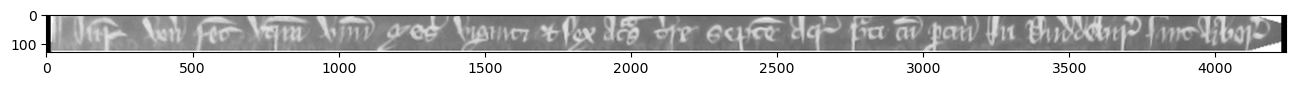

In [5]:
this_target = dataset[0]["target"].cpu()
decoded = ''.join([dataset.codec.l2c[(this_target[i].item(),)] for i in range(len(dataset[0]["target"]))])
print(decoded)

#%matplotlib qt
plt.figure(figsize=(16,1))
plt.imshow(dataset[0]["image"][0], cmap="gray")

In [6]:
#dataset.codec.l2c[(1,)]
print(dataset[0]["target"])

tensor([17, 52, 49, 32, 51, 32,  1, 53, 36, 45, 40, 51,  1, 49, 36, 34, 46, 38,
        45, 40, 51, 52, 49, 32,  1, 52, 51, 49, 52, 44,  1, 52, 45, 52, 44,  1,
        44, 36, 50, 52, 32, 38, 40, 52, 44,  1, 53, 40, 38, 40, 45, 51, 40,  1,
        36, 51,  1, 50, 36, 55,  1, 32, 34, 49, 32, 50,  1, 51, 36, 49, 49, 36,
         1, 50, 36, 47, 51, 36, 44,  1, 32, 34, 49, 36,  1, 47, 49, 32, 51, 40,
         1, 34, 52, 44,  1, 47, 36, 49, 51, 40, 45, 36, 45, 34, 40, 40, 50,  1,
        40, 45,  1, 11, 52, 35, 35, 36, 33, 40, 49,  1, 50, 40, 45, 51,  1, 43,
        40, 33, 36, 49, 32], dtype=torch.int32)


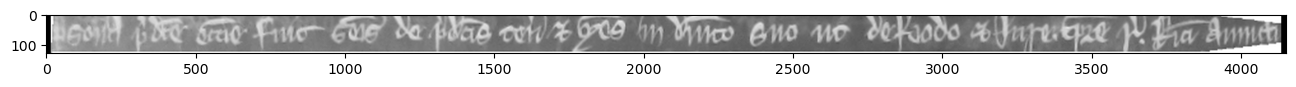

In [7]:
plt.figure(figsize=(16,1))
plt.imshow(dataset[4]["image"][0], cmap="gray")

In [8]:
# net = torch.load("nn.pt")
# print(net)

In [42]:
# class MyNN(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.features = nn.Sequential(
#             nn.Conv2d(1, 32, (4,16), padding=(1,7)),
#             nn.ReLU(),
#             nn.Dropout2d(0.1),
#             nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
#             nn.Conv2d(32, 32, (4,16), padding=(1,7)),
#             nn.ReLU(),
#             nn.Dropout2d(0.1),
#             nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
#             nn.Conv2d(32, 64, (3,8), padding=(1,3)),
#             nn.ReLU(),
#             nn.Dropout2d(0.1),
#             nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
#             nn.Conv2d(64, 64, (3,8), padding=(1,3)),
#             nn.ReLU(),
#             nn.Dropout2d(0.1)
#         )
        
#         self.lstms = nn.ModuleList([
#             nn.LSTM(960, 256, bidirectional=True, batch_first=True),
#             nn.Dropout(0.3),
#             nn.LSTM(512, 256, bidirectional=True, batch_first=True),
#             nn.Dropout(0.3),
#             nn.LSTM(512, 256, bidirectional=True, batch_first=True),
#             nn.Dropout(0.3),
#         ])
#         self.lin = nn.Linear(512, 62)

#     def forward(self, x):
#         x = self.features(x)
#         x = x.contiguous().view(-1, x.shape[1] * x.shape[2], x.shape[3]).transpose(1,2)
#         #x = x.contiguous().view(x.shape[0], x.shape[3], x.shape[1] * x.shape[2])
        
#         for layer in self.lstms:
#             if isinstance(layer, nn.LSTM):
#                 x, _ = layer(x)
#             else:
#                 x = layer(x)      
#         x = self.lin(x)
#         x = nn.functional.log_softmax(x, dim=2)
#         return x.transpose(1,2)

# net = MyNN()

In [43]:
class MyNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, (4,16), padding=(1,7)),
            nn.ReLU(),
            nn.BatchNorm2d(32),            
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            nn.Conv2d(32, 32, (4,16), padding=(1,7)),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            nn.Conv2d(32, 64, (3,8), padding=(1,3)),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            nn.Conv2d(64, 64, (3,8), padding=(1,3)),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        
        self.lstms = nn.ModuleList([
            nn.LSTM(960, 256, bidirectional=True, batch_first=True),
            #nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.LSTM(512, 256, bidirectional=True, batch_first=True),
            nn.Dropout(0.3),
            #nn.BatchNorm1d(256),
            nn.LSTM(512, 256, bidirectional=True, batch_first=True),
            nn.Dropout(0.3),
        ])
        self.lin = nn.Linear(512, 62)

    def forward(self, x):
        x = self.features(x)
        x = x.contiguous().view(-1, x.shape[1] * x.shape[2], x.shape[3]).transpose(1,2)
        #x = x.contiguous().view(x.shape[0], x.shape[3], x.shape[1] * x.shape[2])
        
        for layer in self.lstms:
            if isinstance(layer, nn.LSTM):
                x, _ = layer(x)
            else:
                x = layer(x)      
        x = self.lin(x)
        x = nn.functional.log_softmax(x, dim=2)
        return x.transpose(1,2)

net = MyNN()

In [44]:
#device = torch.device("cuda")

class LatinTranscriber(L.LightningModule):
    def __init__(self, net, codec_l2c):
        super().__init__()
        self.codec_l2c = codec_l2c
        self.cer_calc = CharErrorRate()
        self.wer_calc = WordErrorRate()
        self.train_cer_calc = CharErrorRate()
        self.train_wer_calc = WordErrorRate()
        self.net = net
                
    def get_loss(self, batch, batch_idx):
        target = batch["target"]
        target_length = batch["target"].shape[1]
       
        #self.net = self.net.to(device)
        input = batch["image"]#.to(device)
        
        #output, _ = self.net(input)
        output = self.net(input)
        #print("Output shape", output.shape)
        # height should be 1 by now
        #if output.size(2) != 1:
        #    raise ValueError('Expected dimension 3 to be 1, actual {}'.format(output.size(2)))
        #output = output.squeeze(2)
        
        output_length = output.shape[-1]
        
        loss_func = nn.CTCLoss(reduction='sum', zero_infinity=True)
        loss = loss_func(output.permute(2,0,1), target, (output_length,), (target_length,))
        return loss, output
    
    def on_train_epoch_start(self):
        self.train_cer_calc.reset()
        self.train_wer_calc.reset()
        
    def on_train_epoch_end(self):
        char_accuracy = 1 - self.train_cer_calc.compute()
        word_accuracy = 1 - self.train_wer_calc.compute()
        self.log("train_char_acc", char_accuracy)
        self.log("train_word_acc", word_accuracy)

    def training_step(self, batch, batch_idx):
        assert self.net.training
        loss, output = self.get_loss(batch, batch_idx)
        prediction, truth = self.get_prediction_and_truth(output, batch["target"])
        self.train_cer_calc.update(truth, prediction)
        self.train_wer_calc.update(truth, prediction)
        self.log("train_loss", loss)
        return loss
    
    def get_prediction_and_truth(self, output, target):
        target = torch.squeeze(target).cpu().numpy()
        truth = ''.join([self.codec_l2c[(target[i].item(),)] for i in range(len(target))])        
        labels = torch.argmax(torch.squeeze(output), axis=0).cpu().numpy()
        prediction = ""
        for i in range(len(labels)):
            label = labels[i]
            if label != 0 and (i==0 or label != labels[i-1]):
                prediction += self.codec_l2c[(label,)]
                
        return prediction, truth
    
    def validation_step(self, batch, batch_idx):
        assert not self.net.training
        assert batch["target"].shape[0] == 1
        loss, output = self.get_loss(batch, batch_idx)
        prediction, truth = self.get_prediction_and_truth(output, batch["target"])
        self.cer_calc.update(truth, prediction)
        self.wer_calc.update(truth, prediction)
        
        # Get tensorboard logger
        if batch_idx < 16:
            tb_logger = None
            for logger in self.trainer.loggers:
                if isinstance(logger, pl_loggers.TensorBoardLogger):
                    tb_logger = logger.experiment
                    break

            tb_logger.add_image(f'Validation #{batch_idx}, target: {truth}', batch['image'][0], self.global_step, dataformats="CHW")
            tb_logger.add_text(f'Validation #{batch_idx}, target: {truth}', prediction, self.global_step)

        return loss
    
    def on_validation_epoch_start(self):
        self.cer_calc.reset()
        self.wer_calc.reset()
        
    def on_validation_epoch_end(self):
        char_accuracy = 1 - self.cer_calc.compute()
        word_accuracy = 1 - self.wer_calc.compute()
        print("Epoch, char acc, word acc:", self.current_epoch, round(char_accuracy.item(), 4), round(word_accuracy.item(), 4))
        self.log("val_char_acc", char_accuracy)
        self.log("val_word_acc", word_accuracy)

    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(), lr=1e-3, weight_decay=1e-2)
        return optimizer

transcriber = LatinTranscriber(net, dataset.codec.l2c)

In [45]:
train_set_size = int(len(dataset) * 0.9)
valid_set_size = len(dataset) - train_set_size

# split the train set into two
seed = torch.Generator().manual_seed(40)
train_set, valid_set = torch.utils.data.random_split(dataset, [train_set_size, valid_set_size], generator=seed)

train_loader = utils.data.DataLoader(train_set, num_workers=4)
valid_loader = utils.data.DataLoader(valid_set, num_workers=4)

In [46]:
print(train_set_size, valid_set_size)

496 56


In [ ]:
trainer = L.Trainer(accumulate_grad_batches=1, max_epochs=250)
trainer.fit(transcriber, train_loader, valid_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type          | Params
-------------------------------------------------
0 | cer_calc       | CharErrorRate | 0     
1 | wer_calc       | WordErrorRate | 0     
2 | train_cer_calc | CharErrorRate | 0     
3 | train_wer_calc | WordErrorRate | 0     
4 | net            | MyNN          | 5.9 M 
-------------------------------------------------
5.9 M     Trainable params
0         Non-trainable params
5.9 M     Total params
23.582    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 0 -35.3333 -17.5


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 0 -inf -inf


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 1 -inf -inf


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 2 -inf -inf


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 3 -105.3036 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 4 -51.8839 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 5 -33.8452 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 6 -33.9226 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 7 -24.9554 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 8 -24.9643 -15.8571


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 9 -24.9554 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 10 -24.9554 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 11 -32.5575 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 12 -24.8438 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 13 -24.8438 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 14 -24.8438 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 15 -24.8438 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 16 -24.8438 -15.875


Validation: 0it [00:00, ?it/s]

Epoch, char acc, word acc: 17 -24.8438 -15.875


In [34]:
#torch.save(net.state_dict(), "my_custom_best.pt") %94% char, 82% word